<h1>Introdu&ccedil;&atilde;o &agrave; An&aacute;lise Qualitativa de Equa&ccedil;&otilde;es Diferenciais</h1>
<p>Neste documento vamos explorar algums aspectos b&aacute;sicos da an&aacute;lise de sistemas din&acirc;micos representados por equa&ccedil;&otilde;es diferenciais ordin&aacute;rias. Muito do que ser&aacute; explorado aqui tem rela&ccedil;&atilde;o com o que se conhece como "teoria qualitativa da equa&ccedil;&otilde;es diferenciais". Esta &aacute;rea da matem&aacute;tica, criada por <a href="http://en.wikipedia.org/wiki/Henri_Poincar%C3%A9" target="_blank">Henri Poincar&eacute;</a>&nbsp;envolve a an&aacute;lise das propriedades das solu&ccedil;&otilde;es de EDOs sem necessariamente ter que explicit&aacute;-las.</p>
<p>Vamos aprender como definir um sistema de EDOs no SAGE &nbsp;e resolv&ecirc;-lo analiticamente, quando poss&iacute;vel e numericamente usando o m&eacute;todo de Runge-Kutta Prince-Dormand.</p>
<h2>Sistema de EDOs lineares</h2>
<p>Vamos come&ccedil;ar com um sistema muito simples inspirado na qu&iacute;mica:</p>
<p>$\frac{dA}{dt}=-k_1A+k_2B$</p>
<p>$\frac{dB}{dt}=k_1A-k_2B$</p>
<p>O sistema acima representa a cin&eacute;tica qu&iacute;mica de uma mol&eacute;cula que pode exibir dois estados: $A$ e $B$.</p>
<p>$A \leftrightarrows^{k_2}_{k_1} B$</p>
<p>Neste caso temos a possibilidade de resolu&ccedil;&atilde;o anal&iacute;tica ou num&eacute;rica do modelo. Vamos explorar ambas.</p>
<h3>Solu&ccedil;&atilde;o Num&eacute;rica</h3>
<p>Para resolver o sistema de equa&ccedil;&otilde;es, numericamente precisamos definir uma fun&ccedil;&atilde;o em Python de nos retorne as derivadas, ou seja o lado direito das equa&ccedil;&otilde;es de nosso sistema, dado o estado atual do mesmo.</p>

In [10]:
%display typeset

In [1]:
def ODEsys(t,y,params):
    k1,k2 = params
    A,B = y
    return[-k1*A+k2*B,
            k1*A-k2*B]



Agora fazemos a Integração numérica, Runge-Kutta 8/9 Prince-Dormand. 


In [3]:
T=ode_solver()
T.algorithm="rk8pd"
T.function=ODEsys
T.ode_solve(y_0=[500,0],t_span=[0,50],params=[.3,.25],num_points=200)

Vejamos agora o formato de saída da solução.

In [5]:
T.solution[:10]

[(0, [500, 0]),
 (0.25, [464.9639136355884, 35.03608636441148]),
 (0.5, [434.42876087953675, 65.57123912046313]),
 (0.75, [407.81632637022733, 92.18367362977253]),
 (1.0, [384.6226755583144, 115.37732444168543]),
 (1.25, [364.4086121738929, 135.591387826107]),
 (1.5, [346.7913615813497, 153.2086384186502]),
 (1.75, [331.43732253744054, 168.56267746255938]),
 (2.0, [318.0557500994762, 181.94424990052374]),
 (2.25, [306.39325006281507, 193.6067499371849])]

A saída é uma lista de tuplas com o valor da variável indepentente ($t$) na primeira posição, e um vetor com o estado do sistema naquele instante.

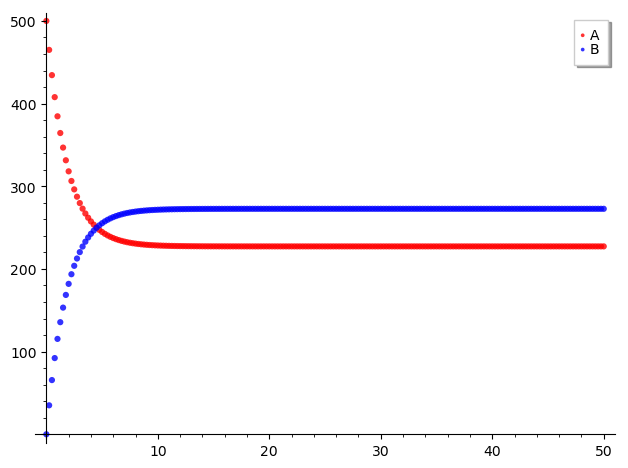

In [6]:
a=list_plot([(i[0],i[1][0]) for i in T.solution],color='red', pointsize=20, legend_label='A', alpha=.8)
b=list_plot([(i[0],i[1][1]) for i in T.solution],color='blue', pointsize=20, legend_label='B', alpha=.8)
a.legend()
b.legend()
show(a+b)


### Solução Analítica

Como o nosso sistema trata-se de um sistema de EDOs lineares, Também é possível uma solução analítica:


In [9]:
var('t k_1 k_2')

A = function('A')(t)
B = function('B')(t)
de1 = diff(A,t) == -k_1*A+k_2*B
de2 = diff(B,t) == k_1*A-k_2*B
sol = desolve_system([de1,de2],[A,B],ics=[0,500,0], ivar=t)
show(sol)

[A(t) == 500*k_1*e^(-(k_1 + k_2)*t)/(k_1 + k_2) + 500*k_2/(k_1 + k_2),
 B(t) == -500*k_1*e^(-(k_1 + k_2)*t)/(k_1 + k_2) + 500*k_1/(k_1 + k_2)]

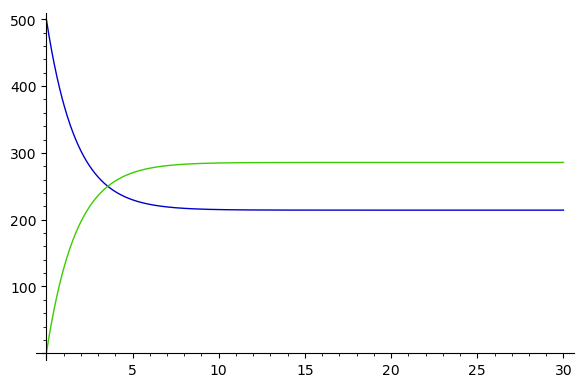

In [11]:
# Atribuindo  valores para as taxas de conversão:
# k1=1/3
# k2=1/4
solA, solB = sol[0].rhs(), sol[1].rhs()
plot((solA(k_1=1/3, k_2=1/4),solB(k_1=1/3, k_2=1/4)),(t,0,30))

Valor de A no Equilíbrio:

In [12]:
k1=1/3
k2=1/4
n(k2*500/(k1+k2))

214.285714285714


### Equilíbrios

O equilíbrio de um sistema dinâmico se dá quando todas as suas derivadas são igual a zero, ou seja, é um estado do qual sistema não sairá a menos que perturbado.

No caso acima, $dA/dt=0$ e $dB/dt=0$ ou $k_1A=k_2B$

Para um modelo simples como esse, escrever o equilíbrio é trivial, mas também podemos usar o Sage para encontrar os equilíbrios:


In [16]:
var('A B k1 k2')
#k1 = 1/3
#k2 = 1/4
dadt(A, B) = -k1*A+k2*B
dbdt(A, B) = k1*A-k2*B
eqs = solve([dadt, dbdt], [A, B])
show(html("<h4>Equilíbrios:</h4>"))
show(eqs)

<h4>Equilíbrios:</h4>

[[A == k2*r4/k1, B == r4]]



Um outra maneira de olhar para o modelo, é representá-lo matricialmente:

$X' = M X$

onde $X'=[dA/dt, dB/dt]$ é um vetor coluna, $M$ é a matrix de coeficientes do modelo e $X=[A(t), B(t)]$ de dimensões 2x1.


In [22]:
M = matrix([[-1/3, 1/4],[1/3,-1/4]])
show("M=",M)
X = matrix([[A],[B]])
show("X=",X)
M*X

'M=' [-1/3  1/4]
[ 1/3 -1/4]

'X=' [A]
[B]

[-1/3*A + 1/4*B]
[ 1/3*A - 1/4*B]

Se Calcularmos o determinante de M, vemos que com a atual parametrização do modelo ele, $det M = 0$:

In [23]:
M.determinant()

0

O Que isto nos diz sobre o(s) equilíbrio(s) do sistema?

**Exercício:**

Tente reescrever o modelo, de forma que o determinante de $M$ seja diferente de $0$, e calcule os equilíbrios.

Se quisermos calcular o valor de A no equilíbrio, fica fácil ver que ele dependerá das condições iniciais do problema.

Sabemos que a trata-se de um sistema fechado onde o total de moléculas é constante, $A+B=T$. Temos que, no equilíbrio, $$A=\frac{k_2 B}{k_1}$$ que, podemos reescrever como $$A=\frac{k_2(T-A)}{k_1}$$ e após algumas manipulações concluímos que $$A=\frac{k_2 T}{k_1 +k_2}$$ Aplicando os valores de parâmetros da simulação acima:


In [24]:
k1 = 1/3
k2 = 1/4
n(k2*500/(k1+k2))

214.285714285714

### Espaço de estados
Uma maneira de inspecionar gráficamente o comportamento na vizinhança do equilíbrio é através do campo vetorial. Neste tipo de gráfico representamos o vetor resultante das duas derivadas do sistema, em vários pontos do espaço de estados.

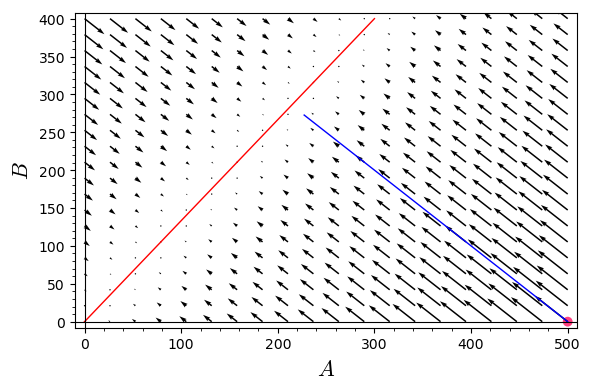

In [25]:
var('a b')
solut = line([i[1] for i in T.solution])
ponto_inicial = point(T.solution[0][1], pointsize=50,rgbcolor=(1,1/4,1/2))
vf = plot_vector_field((-k1*a+k2*b,k1*a-k2*b),(a,0,500),(b,0,400),axes_labels=[r'$A$',r'$B$'])
atrator = plot(k1*a/k2, (a,0,300), color='red')
show(solut+vf+ponto_inicial+atrator)

Pela figura, vemos que existem infinitos equilíbrios possíveis para o nosso sistema, posicionados ao longo de uma reta: $k_1A=k_2B$. Neste caso, o estado final do sistema vai depender das condições iniciais: $A(0)$ e $B(0)$ .  Se plotarmos as derivadas contra os valores de A e B, obtemos o que se chama de "phase portrait", onde novamente observamos a reta que contém os equilíbrios como a interseção dos planos.

In [26]:
(plot3d(-k1*a+k2*b,(a,0,500),(b,0,400), opacity=0.8)+plot3d(k1*a-k2*b,(a,0,500),(b,0,400),color='red'))

Graphics3d Object



Outra maneira de estudar a estabilidade do sistema é através da matriz Jacobiana.

Na célula a seguir, criamos as versões simbólicas das equações diferenciais para uso posterior, como por exemplo para o cálculo da Jacobiana do sistema. A Matriz Jacobiana do sistema é muito importante para entender o seu comportamento. Se entendemos um sistema de equações diferenciais como descrevendo o movimento de um ponto no $\mathbb{R}^n$, A matrix Jacobiana, sendo a matriz das derivadas parciais do sistema:
Estudando os Equilíbrios, A matriz Jacobiana

Seja $f(x)$ nosso sistema de EDOS onde $x$ representa o vetor de estados, A matriz jacobana é dada por:

 
$$
\begin{bmatrix}{\dfrac {\partial f_{1}}{\partial x_{1}}}&\cdots &{\dfrac {\partial f_{1}}{\partial x_{n}}}\\\vdots &\ddots &\vdots \\{\dfrac {\partial f_{m}}{\partial x_{1}}}&\cdots &{\dfrac {\partial f_{m}}{\partial x_{n}}}\end{bmatrix}
$$

In [28]:
jack = jacobian([-k1*A+k2*B, k1*A-k2*B],[A,B])
show(html("<h3>Jacobiana:</h3>"))
show(jack)

<h3>Jacobiana:</h3>

[-1/3  1/4]
[ 1/3 -1/4]

In [29]:
jack.eigenvalues()

[-7/12, 0]

Neste caso, temos autovalores reais e distintos como um dos autovalores é negativo e o outro é zero, temos que o equilíbrio é uma linha reta de equilíbrios estáveis, ou seja onde quer que as condições iniciais sejam definidas o sistema sempre convergirá para a linha reta. Como vimos no diagrama de fase acima.

#### Estabilidade do Equilíbrio

Vamos introduzir um sistema ainda mais simples para começar a examinar a estabilidade de equilíbrios de um sistema dinâmico.

$$\frac{dx}{dt}=I-\gamma x$$

O sistema acima se chama produção e decaimento, pois $x$ é produzido a uma taxa constante $I$ e decai a uma taxa $\gamma$

In [30]:
var('t I gamma x0')
x=function('x')(t)
dxdt = diff(x,t)== I-gamma*x
sol = desolve(dxdt,x,ivar=t, ics=[0,x0])
show(sol)

(gamma*x0 + I*e^(gamma*t) - I)*e^(-gamma*t)/gamma

Vamos pllotar a solução para $I=1$, $\gamma=1/2$ e alguns valores diferentes de $x_0$.

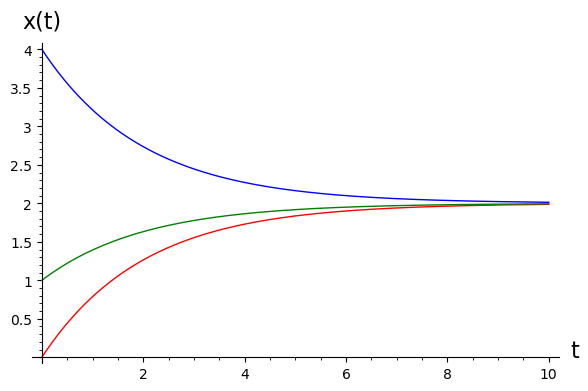

In [32]:
f(t) = sol(I=1,gamma=1/2,x0=4)
g(t) = sol(I=1,gamma=1/2,x0=0)
h(t) = sol(I=1,gamma=1/2,x0=1)
(plot(f, 0,10,axes_labels=['t','x(t)']) + plot(g, 0,10,axes_labels=['t','x(t)'], color='red') +\
 plot(h, 0,10,axes_labels=['t','x(t)'], color='green'))

Temos aqui um equilíbrio de ponto fixo. Qual é este equilíbrio? Para isso basta resolver a equação do modelo quando $\frac{dx}{dt}=0$

In [33]:
solve(I-gamma*x,x)

[x(t) == I/gamma]



Vimos que o sistema de Produção e decaimento, apresenta um equilíbrio pontual, ou seja qualquer que seja a condição inicial do sistema, ele converge para um ponto onde permanece indefinidamente. Equilíbrios do tipo "ponto fixo"  não são o único tipo de equilíbrio que se pode observar em sistemas dinâmicos. Mas exploraremos cada tipo de equilíbrio através de exemplos. 

Dizer que um equilíbrio é estável significa dizer que se o sistema sofrer uma pequena perturbação, deverá retornar ao equilíbrio


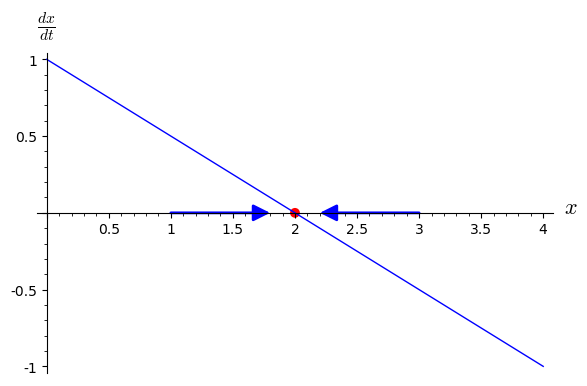

In [34]:
d(x) = I-gamma*x
p = point((2,0),pointsize=50, color="red")
a1 = arrow((3,0),(2.2,0))
a2 = arrow((1,0),(1.8,0))
(plot(d(gamma=1/2,I=1), 0,4, axes_labels=[r"$x$",r"$\frac{dx}{dt}$"]) + p + a1 + a2)



Vemos no gráfico acima que $\frac{dx}{dt} \lt 0$ quando $x\gt \frac{I}{\gamma}$ e $\frac{dx}{dt} \gt 0$ quando $x\lt \frac{I}{\gamma}$. Logo podemos concluir que o equilíbrio indicado acima é estável. 

Assim encontramos o primeiro tipo de Equilíbrio que sistemas dinâmicos podem apresentar. No caso do sistema unidimensional que exploramos apenas a derivada da solução no equilíbrio nos dá a estabilidade. Mas para sistemas de EDOs temos que recorred aos autovalores da matriz Jacobiana no equilíbrio. Além dos seus sinais, teremos que saber se são reais ou complexos.
#### Equilíbrio em Ponto de Sela

Retomando o primeiro exemplo deste documento, para o qual já haviamos determinado os equilíbrios e calculado a Jacobiana, Vamos agora determinar o tipo e a estabilidade do seu equilíbrios. Vamos primeiro recuperar a matriz jacobiana, e reparar que ela é a matriz dos coeficientes do sistema:


In [35]:
M = matrix(QQ, [[-1/3,1/4,],[1/3,-1/4]])
M

[-1/3  1/4]
[ 1/3 -1/4]

Agora podemos calcular os seus autovalores.

In [36]:
M.eigenvalues()

[0, -7/12]



Neste caso temos autovalores reais, distintos e com sinais opostos. Esta combinação indica um equilíbrio de ponto de sela como observamos anteriormente.

Vale notar também que os autovalores são as raízes da chamada "equação característica" ou "polinômio característico" do sistema.

O polinômio  característico  de uma matriz $M$ quadrada de ordem $n$ é o seguinte: $$p_{M}(x) = det[x I - M]$$
onde $I$ é a matriz identidade $n\times n$.


In [39]:
cp = M.characteristic_polynomial()
cp

x^2 + 7/12*x

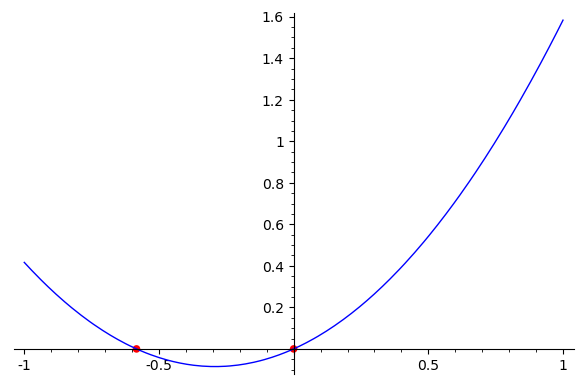

In [40]:
r1 = point((-7/12,0),pointsize=30,color='red')
r2 = point((0,0),pointsize=30,color='red')
(plot(cp) + r1 + r2)